## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Preparación de los datos

---

En esta libreta se realizan las transforamciones sobre los datasets del escenario en función 
de los resultados de la verificación de calidad de datos. 

---

In [1]:
#Se importan las librerias a utilizar

import pandas as pd

----

##### Lectura de los datasets

In [2]:
df_creditos = pd.read_csv("../../data/processed/datos_creditos_c.csv", sep=";")
display(df_creditos.head(1))

df_tarjetas = pd.read_csv("../../data/processed/datos_tarjetas_c.csv", sep=";")
display(df_tarjetas.head(1))

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


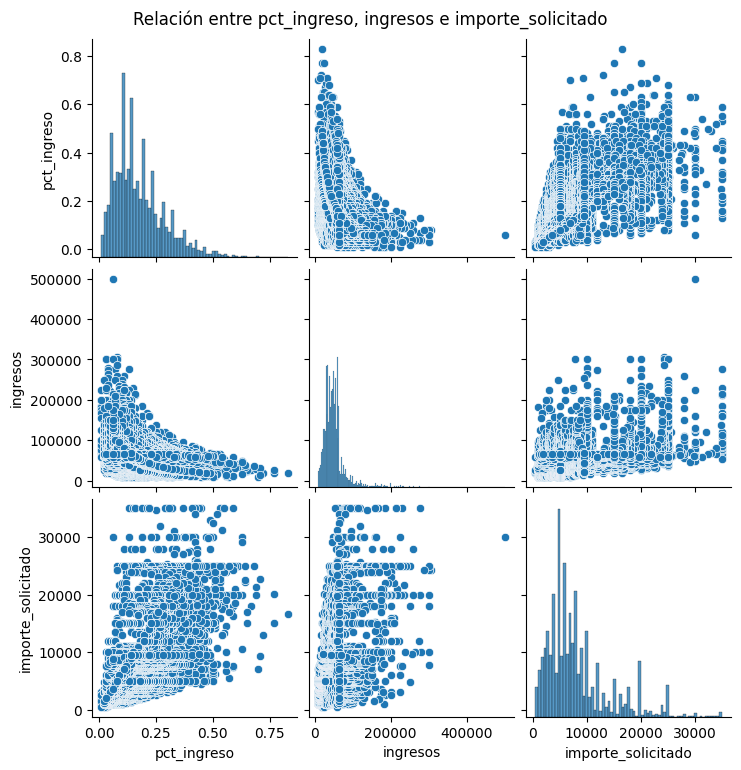

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Matriz de gráficos bivariable (pairplot)
sns.pairplot(df_creditos[['pct_ingreso', 'ingresos', 'importe_solicitado']])
plt.suptitle('Relación entre pct_ingreso, ingresos e importe_solicitado', y=1.02)
plt.show()



---
#### Aplicación de transformaciones

**Operaciones a realizar**

1. Selección de columnas
2. Filtrado de filas
3. Construcción de atributos
4. Integración de datasets
5. Formateo definitivo


----

Selección de datos

In [4]:
# Se establece qué columnas se eliminan

col_eliminar_creditos = []
col_eliminar_tarjetas = ['nivel_tarjeta']

# Se ejecuta la operación

df_creditos.drop(col_eliminar_creditos, inplace=True, axis=1)
df_tarjetas.drop(col_eliminar_tarjetas, inplace=True, axis=1)

In [5]:
print("Vista del dataset de datos de créditos:")
display(df_creditos.head(1))

print("Vista del dataset de datos de tarjetas:")
display(df_tarjetas.head(1))

Vista del dataset de datos de créditos:


,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


Vista del dataset de datos de tarjetas:


,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,24.0,2.0


Limpieza de los datos (filtrado a nivel de filas)

In [6]:
#regla 1
#Se puede definir una función para aplicar los cálculos
def regla_pct_ingresos_credito(row):
    pct_ingreso = row.pct_ingreso
    ingresos = row.ingresos
    
    if pct_ingreso > 0.5 and ingresos <= 20000:
        # Es un error, no cumple la regla definida
        return 'err'
    else:
        return 'ok'


# Se aplica la función para todos los elementos del dataset
regla_pct_ingresos = df_creditos.apply(lambda row: regla_pct_ingresos_credito(row), axis=1).rename("regla_pct_ingresos")

# Se unen los resultados al dataset inicial
df_creditos = pd.concat([df_creditos, regla_pct_ingresos], axis=1)
df_creditos.head(5)  

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago,regla_pct_ingresos
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y,ok
1,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,11.14,0,N,ok
2,818770008.0,25,5500,3,1.0,HIPOTECA,9600,SALUD,0.57,12.87,1,N,err
3,713982108.0,23,35000,2,4.0,ALQUILER,65500,SALUD,0.53,15.23,1,N,ok
4,710821833.0,24,35000,4,8.0,ALQUILER,54400,SALUD,0.55,14.27,1,Y,ok


In [7]:
#regla 2
# Obtener la duración mínima de crédito
min_duracion = df_creditos['duracion_credito'].min()

# Función para aplicar la regla 2
def regla_duracion_pct_ingresos(row):
    if row['duracion_credito'] == min_duracion:
        if row['pct_ingreso'] > 0.6 and row['situacion_vivienda'] != 'PROPIA':
            return 'err'
    return 'ok'

# Aplicar la función
regla2_resultado = df_creditos.apply(lambda row: regla_duracion_pct_ingresos(row), axis=1).rename("regla_2")

# Se unen los resultados al dataset inicial
df_creditos = pd.concat([df_creditos, regla2_resultado], axis=1)
df_creditos.head(5)  

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago,regla_pct_ingresos,regla_2
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y,ok,ok
1,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,11.14,0,N,ok,ok
2,818770008.0,25,5500,3,1.0,HIPOTECA,9600,SALUD,0.57,12.87,1,N,err,ok
3,713982108.0,23,35000,2,4.0,ALQUILER,65500,SALUD,0.53,15.23,1,N,ok,ok
4,710821833.0,24,35000,4,8.0,ALQUILER,54400,SALUD,0.55,14.27,1,Y,ok,ok


In [8]:
# Se filtran las filas con algún error detectado
print(f"Filas antes del filtro: {df_creditos.shape[0]}")

# temp = df_creditos[df_creditos['edad'] < 90] # 4
temp =  df_creditos[
    (df_creditos['edad'] < 90) &
    ((df_creditos['antiguedad_empleado'] < 50) | (df_creditos['antiguedad_empleado'].isna()))
] #4 + 2

# Otro filtro posible: por las reglas de negocio agregadas
temp_c = temp[
    (temp['regla_pct_ingresos'] == 'ok') & #15
    (temp['regla_2'] == 'ok') #7
]

print(f"Filas después del filtro: {temp_c.shape[0]}")


Filas antes del filtro: 10127
Filas después del filtro: 10101


In [9]:
#valores faltantes

temp_c = temp_c.copy()

print(f"Nulos en 'antiguedad_empleado' antes de imputación: {temp_c['antiguedad_empleado'].isna().sum()}")
print(f"Nulos en 'tasa_interes' antes de imputación: {temp_c['tasa_interes'].isna().sum()}")


mediana_antiguedad = temp_c['antiguedad_empleado'].median()
temp_c['antiguedad_empleado'] = temp_c['antiguedad_empleado'].fillna(mediana_antiguedad)


mediana_tasa = temp_c['tasa_interes'].median()
temp_c['tasa_interes'] = temp_c['tasa_interes'].fillna(mediana_tasa)

print(f"Nulos en 'antiguedad_empleado' después de imputación: {temp_c['antiguedad_empleado'].isna().sum()}")
print(f"Nulos en 'tasa_interes' después de imputación: {temp_c['tasa_interes'].isna().sum()}")

print(f"Filas después del filtro e imputación: {temp_c.shape[0]}")

Nulos en 'antiguedad_empleado' antes de imputación: 336
Nulos en 'tasa_interes' antes de imputación: 910
Nulos en 'antiguedad_empleado' después de imputación: 0
Nulos en 'tasa_interes' después de imputación: 0
Filas después del filtro e imputación: 10101


Integración de datos

In [10]:
df_integrado = pd.merge(temp_c, df_tarjetas, on='id_cliente', how='inner')
coincidencias = df_integrado.shape[0]

print(f"Filas del dataset integrado con los filtros realizados: {coincidencias}")

Filas del dataset integrado con los filtros realizados: 10101


In [11]:
print(f"Cantidad de columnas del dataset integrado: {df_integrado.shape[1]}")

Cantidad de columnas del dataset integrado: 23


In [12]:
df_integrado.head(1)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,regla_2,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,operaciones_ult_12m,personas_a_cargo
0,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.1,11.14,...,ok,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,42.0,3.0


#### Transformación de atributos

Atributos nominales que se modifican los valores

In [13]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = df_integrado.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil_N')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'P',
    1 : 'C',
}

estado_credito_N = df_integrado.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito_N')

# Sobre este resultado será necesario eliminar las columnas auxiliares

cambios_nivel_educativo = {
    'UNIVERSITARIO_COMPLETO' : 'UC',
    'UNIVERSITARIO_INCOMPLETO' : 'UI',
    'DESCONOCIDO' : 'N',
    'SECUNDARIO_COMPLETO' : 'SC',
    'POSGRADO_INCOMPLETO' : 'PI',
    'POSGRADO_COMPLETO' : 'PC',
}

nivel_educativo_N = df_integrado.loc[:, ('nivel_educativo')].map(cambios_nivel_educativo).rename('nivel_educativo_N')

Atributos numéricos que se discretizan

In [16]:
df_integrado['antiguedad_empleado'].describe()

count    10101.000000
mean         3.920008
std          2.802746
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         11.000000
Name: antiguedad_empleado, dtype: float64

In [14]:
# Antiguedad del empleado

etiquetas_a_e = ['menor_5', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(df_integrado['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(df_integrado['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(df_integrado['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(df_integrado['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(df_integrado['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(df_integrado['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(df_integrado['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_2k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 1999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(df_integrado['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(df_integrado['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

operaciones_ult_12m_N.value_counts()

# importe_solicitado (Nuevo)
etiquetas_i_s = ['menor_2k', '2k_a_5k', '5k_a_10k', '10k_a_20k', 'mayor_20k']
rangos_i_s = [0, 1999, 4999, 9999, 19999, 35000]

# Aplicar la transformación a la variable 'importe_solicitado'
importe_solicitado_N = pd.cut(df_integrado['importe_solicitado'], 
                               bins=rangos_i_s, 
                               labels=etiquetas_i_s)

# Ver la cantidad de valores en cada categoría
importe_solicitado_N.value_counts()


importe_solicitado
5k_a_10k     4526
2k_a_5k      2425
10k_a_20k    1933
mayor_20k     727
menor_2k      490
Name: count, dtype: int64

In [16]:
df_integrado.columns

Index(['id_cliente', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'falta_pago', 'regla_pct_ingresos', 'regla_2', 'antiguedad_cliente',
       'estado_civil', 'estado_cliente', 'gastos_ult_12m', 'genero',
       'limite_credito_tc', 'nivel_educativo', 'operaciones_ult_12m',
       'personas_a_cargo'],
      dtype='object')

In [17]:
# Agregar en este listado otros atributos que pudieran discretizarse o transformarse
col_eliminar_final = [
              'estado_civil',
              'estado_credito',
              'nivel_educativo',
              'antiguedad_empleado',
              'edad',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'regla_pct_ingresos',
              'regla_2',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'importe_solicitado',
              'id_cliente'] #anonimizar 

df_integrado.drop(col_eliminar_final, inplace=True, axis=1)

df_final = pd.concat([importe_solicitado_N,
                      operaciones_ult_12m_N, 
                      gastos_ult_12m_N, 
                      limite_credito_tc_N, 
                      antiguedad_cliente_N, 
                      tasa_interes_N, 
                      ingresos_N, 
                      pct_ingreso_N, 
                      antiguedad_empleados_N, 
                      edad_N, 
                      estado_civil_N, 
                      estado_credito_N,
                      nivel_educativo_N,
                      df_integrado], axis=1)
df_final.head(5)


,importe_solicitado,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,nivel_educativo_N,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,personas_a_cargo
0,menor_2k,30_a_50,menor_2k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,SC,2,PROPIA,EDUCACIÓN,N,ACTIVO,M,3.0
1,mayor_20k,15_a_30,menor_2k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,UC,2,ALQUILER,SALUD,N,ACTIVO,M,3.0
2,mayor_20k,15_a_30,menor_2k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,N,4,ALQUILER,SALUD,Y,ACTIVO,M,1.0
3,2k_a_5k,15_a_30,menor_2k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,SC,2,PROPIA,INVERSIONES,N,ACTIVO,F,4.0
4,mayor_20k,15_a_30,menor_2k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,C,C,UI,3,ALQUILER,EDUCACIÓN,N,ACTIVO,M,3.0


Exportación de metadatos

In [18]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_final, title="Reporte de preparación de datos - Dataset integrado")
profile.to_file("../../docs/reporte_datos_integrados.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
print(f"Cantidad de columnas del dataset final: {df_final.shape[1]}")
print(f"Cantidad de filas del dataset final: {df_final.shape[0]}")

Cantidad de columnas del dataset final: 20
Cantidad de filas del dataset final: 10101


Exportación del dataset

In [20]:
df_final.to_csv("../../data/final/datos_finales.csv", sep=';', index=False)